In [1]:
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install torch
!pip install pennylane
!pip install pytorch
!pip install pytorch-lightning
!pip install qiskit
!pip install qiskit-algorithms


  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  ERROR: Command errored out with exit status 1:
   command: /home/studio-lab-user/.conda/envs/default/bin/python3.9 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-q3pmox40/pytorch_865a0a316bdf466685d89c76572a4474/setup.py'"'"'; __file__='"'"'/tmp/pip-install-q3pmox40/pytorch_865a0a316bdf466685d89c76572a4474/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-fp4gts3n
       cwd: /tmp/pip-install-q3pmox40/pytorch_865a0a316bdf466685d89c76572a4474/
  Complete output (5 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "/tmp/pip-install-q3pmox40/pytorch_865a0a316bdf466685d89c76572a4474/setup.py", line 15, in <modu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch import Tensor
from torch.nn import Parameter
import torch.utils.data as Data
from torch.utils.data import RandomSampler
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error
import pennylane as qml
import pytorch_lightning as pl
import math
import time



In [3]:
dfi = pd.read_csv('https://raw.githubusercontent.com/SPUTnik-42/Q-LSTM/main/LSTM_QLSTM_WEN_LI/data/beijing_aqi.csv')
dfi

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


In [4]:
dfi = dfi.loc[dfi['year'] > 2013]
dfi = dfi.drop(['No','year','month','day','hour'], axis=1)
dfi

In [ ]:
dfi.isnull().sum()

In [ ]:
dfi['cbwd_deg'] = dfi['cbwd'].apply(lambda x: 315  if x == 'NW' else ( 45 if x == 'NE' else (135 if x== 'SE' else  225 )))
dfi

In [5]:
df = dfi.dropna()
df = df.reset_index()
df = df.drop(['index','cbwd'], axis=1)
df

,PM2.5,PM10,CO,AQI
0,211.51,340.66,15.24,456.0
1,191.12,257.40,13.11,450.0
2,218.44,351.01,18.35,446.0
3,296.80,600.95,16.67,475.0
4,336.43,714.63,12.17,480.0
...,...,...,...,...
4944,142.61,359.15,2.64,412.0
4945,201.88,464.06,3.79,415.0
4946,272.73,535.32,2.89,432.0
4947,271.46,518.95,3.02,433.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4949 entries, 0 to 4948
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   4949 non-null   float64
 1   PM10    4949 non-null   float64
 2   CO      4949 non-null   float64
 3   AQI     4949 non-null   float64
dtypes: float64(4)
memory usage: 154.8 KB


In [7]:
size = int(len(df) * 0.8)

train = df.iloc[:size].copy()
test = df.iloc[size:].copy()
train

,PM2.5,PM10,CO,AQI
0,211.51,340.66,15.24,456.0
1,191.12,257.40,13.11,450.0
2,218.44,351.01,18.35,446.0
3,296.80,600.95,16.67,475.0
4,336.43,714.63,12.17,480.0
...,...,...,...,...
3954,181.59,378.51,2.88,437.0
3955,183.38,347.46,2.49,432.0
3956,170.97,276.65,2.07,424.0
3957,160.19,243.97,1.56,414.0


In [8]:
train.iloc[:,:1]

,AQI
0,456.0
1,450.0
2,446.0
3,475.0
4,480.0
...,...
3954,437.0
3955,432.0
3956,424.0
3957,414.0


In [9]:
train.iloc[:,1:]

,PM2.5,PM10,CO
0,211.51,340.66,15.24
1,191.12,257.40,13.11
2,218.44,351.01,18.35
3,296.80,600.95,16.67
4,336.43,714.63,12.17
...,...,...,...
3954,181.59,378.51,2.88
3955,183.38,347.46,2.49
3956,170.97,276.65,2.07
3957,160.19,243.97,1.56


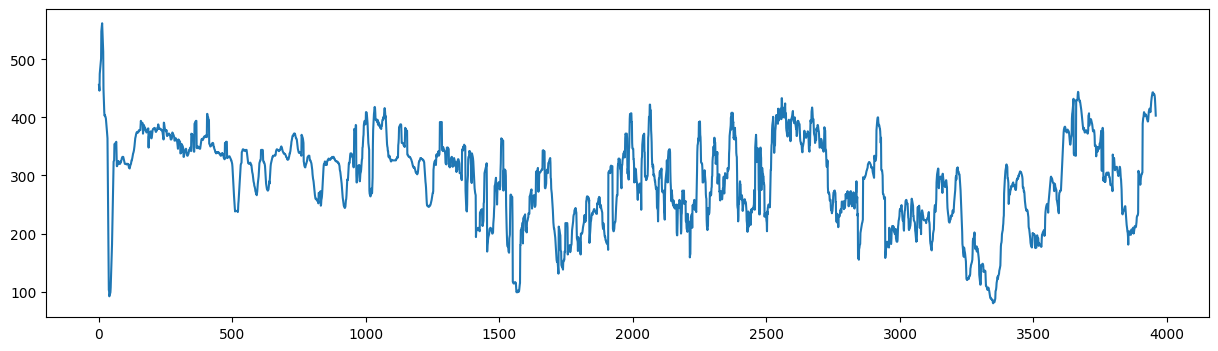

In [10]:
%matplotlib inline
plt.figure(figsize=(15, 4))
plt.plot(range(len(train)), train["pm2.5"])
plt.show()

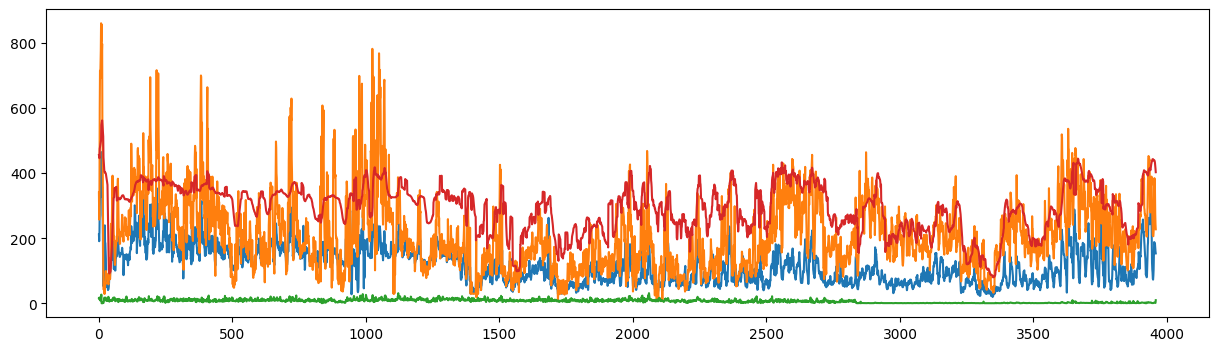

In [11]:
plt.figure(figsize=(15, 4))
plt.plot(train)
plt.show()

In [12]:
def data_process(data, window_size, predict_size):
    scaler1 = StandardScaler()
    scaler2 = StandardScaler()
    d_y = scaler1.fit_transform(data.iloc[:,:1])
    data = scaler2.fit_transform(data.iloc[:,1:])

    data_in = []
    data_out = []
    # range(window_size,len(data)-predict_size+1) range(data.shape[0] - window_size - predict_size + 1)
    for i in range(window_size,len(data)-predict_size+1):
        data_in.append(data[i-window_size:i,0:data.shape[0]])
        data_out.append(d_y[i + predict_size - 1:i + predict_size,0])

    data_in = np.array(data_in)
    data_out = np.array(data_out)

    data_process = {'datain': data_in, 'dataout': data_out}

    return data_process, scaler1 , scaler2

In [13]:
from numpy.random import default_rng
from qiskit_algorithms.utils import algorithm_globals
qubits = 4
seed = 42
np.random.seed(seed)
torch.manual_seed(42)
rng = default_rng(seed)
algorithm_globals.random_seed = seed
features_size = 4
#window_size = features_size * 3
window_size = 10
predict_size = 1

In [14]:
train_processed, train_target_scalar, train_scaler = data_process(train, window_size, predict_size)
X_train, y_train = train_processed['datain'], train_processed['dataout']

test_processed, test_target_scalar, test_scaler = data_process(test, window_size, predict_size)
X_test, y_test = test_processed['datain'], test_processed['dataout']

In [15]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [16]:
print(X_train.shape)
X_train[0][0]

torch.Size([3949, 10, 4])


tensor([1.7163, 1.1380, 1.5963, 2.1931])

In [17]:
class QLSTM(nn.Module):
    def __init__(self,
                input_size,
                hidden_size,
                n_qubits=4,
                n_qlayers=1,
                batch_first=True,
                return_sequences=False,
                return_state=False,
                backend="default.qubit"):
        super(QLSTM, self).__init__()
        self.n_inputs = input_size
        self.hidden_size = hidden_size
        self.concat_size = self.n_inputs + self.hidden_size
        self.n_qubits = n_qubits
        self.n_qlayers = n_qlayers
        self.backend = backend  # "default.qubit", "qiskit.basicaer", "qiskit.ibm"

        self.batch_first = batch_first
        self.return_sequences = return_sequences
        self.return_state = return_state

        #self.dev = qml.device("default.qubit", wires=self.n_qubits)
        #self.dev = qml.device('qiskit.basicaer', wires=self.n_qubits)
        #self.dev = qml.device('qiskit.ibm', wires=self.n_qubits)
        # use 'qiskit.ibmq' instead to run on hardware

        self.wires_forget = [f"wire_forget_{i}" for i in range(self.n_qubits)]
        self.wires_input = [f"wire_input_{i}" for i in range(self.n_qubits)]
        self.wires_update = [f"wire_update_{i}" for i in range(self.n_qubits)]
        self.wires_output = [f"wire_output_{i}" for i in range(self.n_qubits)]

        self.dev_forget = qml.device(self.backend, wires=self.wires_forget)
        self.dev_input = qml.device(self.backend, wires=self.wires_input)
        self.dev_update = qml.device(self.backend, wires=self.wires_update)
        self.dev_output = qml.device(self.backend, wires=self.wires_output)

        def _circuit_forget(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_forget)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_forget)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_forget]
        self.qlayer_forget = qml.QNode(_circuit_forget, self.dev_forget, interface="torch")

        def _circuit_input(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_input)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_input)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_input]
        self.qlayer_input = qml.QNode(_circuit_input, self.dev_input, interface="torch")

        def _circuit_update(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_update)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_update)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_update]
        self.qlayer_update = qml.QNode(_circuit_update, self.dev_update, interface="torch")

        def _circuit_output(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_output)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_output)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_output]
        self.qlayer_output = qml.QNode(_circuit_output, self.dev_output, interface="torch")

        weight_shapes = {"weights": (n_qlayers, n_qubits)}
        print(f"weight_shapes = (n_qlayers, n_qubits) = ({n_qlayers}, {n_qubits})")

        self.clayer_in = torch.nn.Linear(self.concat_size, n_qubits)
        self.VQC = {
            'forget': qml.qnn.TorchLayer(self.qlayer_forget, weight_shapes),
            'input': qml.qnn.TorchLayer(self.qlayer_input, weight_shapes),
            'update': qml.qnn.TorchLayer(self.qlayer_update, weight_shapes),
            'output': qml.qnn.TorchLayer(self.qlayer_output, weight_shapes)
        }
        self.clayer_out = torch.nn.Linear(self.n_qubits, self.hidden_size)
        #self.clayer_out = [torch.nn.Linear(n_qubits, self.hidden_size) for _ in range(4)]

    def forward(self, x, init_states=None):
        '''
        x.shape is (batch_size, seq_length, feature_size)
        recurrent_activation -> sigmoid
        activation -> tanh
        '''
        if self.batch_first is True:
            batch_size, seq_length, features_size = x.size()
        else:
            seq_length, batch_size, features_size = x.size()

        hidden_seq = []
        if init_states is None:
            h_t = torch.zeros(batch_size, self.hidden_size)  # hidden state (output)
            c_t = torch.zeros(batch_size, self.hidden_size)  # cell state
        else:
            # for now we ignore the fact that in PyTorch you can stack multiple RNNs
            # so we take only the first elements of the init_states tuple init_states[0][0], init_states[1][0]
            h_t, c_t = init_states
            h_t = h_t[0]
            c_t = c_t[0]

        for t in range(seq_length):
            # get features from the t-th element in seq, for all entries in the batch
            x_t = x[:, t, :]

            # Concatenate input and hidden state
            v_t = torch.cat((h_t, x_t), dim=1)

            # match qubit dimension
            y_t = self.clayer_in(v_t)

            f_t = torch.sigmoid(self.clayer_out(self.VQC['forget'](y_t)))  # forget block
            i_t = torch.sigmoid(self.clayer_out(self.VQC['input'](y_t)))  # input block
            g_t = torch.tanh(self.clayer_out(self.VQC['update'](y_t)))  # update block
            o_t = torch.sigmoid(self.clayer_out(self.VQC['output'](y_t))) # output block

            c_t = (f_t * c_t) + (i_t * g_t)
            h_t = o_t * torch.tanh(c_t)

            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        return hidden_seq, (h_t, c_t)

class QRegressionLSTM(nn.Module):
    def __init__(self, num_sensors, hidden_units, n_qubits=0, n_qlayers=1):
        super().__init__()
        self.num_sensors = num_sensors  # this is the number of features
        self.hidden_units = hidden_units
        self.num_layers = 1

        self.lstm = QLSTM(
            input_size=num_sensors,
            hidden_size=hidden_units,
            batch_first=True,
            n_qubits = n_qubits,
            n_qlayers= n_qlayers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()

        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn).flatten()  # First dim of Hn is num_layers, which is set to 1 above.

        return out

In [18]:
class QBLSTM(nn.Module):
    def __init__(self,
                input_size,
                hidden_size,
                n_qubits=4,
                n_qlayers=1,
                batch_first=True,
                return_sequences=False,
                return_state=False,
                backend="default.qubit"):
        super(QBLSTM, self).__init__()
        self.n_inputs = input_size
        self.hidden_size = hidden_size
        self.concat_size = self.n_inputs + self.hidden_size
        self.n_qubits = n_qubits
        self.n_qlayers = n_qlayers
        self.backend = backend  # "default.qubit", "qiskit.basicaer", "qiskit.ibm"

        self.batch_first = batch_first
        self.return_sequences = return_sequences
        self.return_state = return_state

        #self.dev = qml.device("default.qubit", wires=self.n_qubits)
        #self.dev = qml.device('qiskit.basicaer', wires=self.n_qubits)
        #self.dev = qml.device('qiskit.ibm', wires=self.n_qubits)
        # use 'qiskit.ibmq' instead to run on hardware

        self.wires_forget_f = [f"wire_forget_f{i}" for i in range(self.n_qubits)]
        self.wires_input_f = [f"wire_input_f{i}" for i in range(self.n_qubits)]
        self.wires_update_f = [f"wire_update_f{i}" for i in range(self.n_qubits)]
        self.wires_output_f = [f"wire_output_f{i}" for i in range(self.n_qubits)]

        self.wires_forget_b = [f"wire_forget_b{i}" for i in range(self.n_qubits)]
        self.wires_input_b = [f"wire_input_b{i}" for i in range(self.n_qubits)]
        self.wires_update_b = [f"wire_update_b{i}" for i in range(self.n_qubits)]
        self.wires_output_b = [f"wire_output_b{i}" for i in range(self.n_qubits)]

        self.dev_forget_f = qml.device(self.backend, wires=self.wires_forget_f)
        self.dev_input_f = qml.device(self.backend, wires=self.wires_input_f)
        self.dev_update_f = qml.device(self.backend, wires=self.wires_update_f)
        self.dev_output_f = qml.device(self.backend, wires=self.wires_output_f)

        self.dev_forget_b = qml.device(self.backend, wires=self.wires_forget_b)
        self.dev_input_b = qml.device(self.backend, wires=self.wires_input_b)
        self.dev_update_b= qml.device(self.backend, wires=self.wires_update_b)
        self.dev_output_b = qml.device(self.backend, wires=self.wires_output_b)

        def _circuit_forget_f(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_forget_f)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_forget_f)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_forget_f]
        self.qlayer_forget_f = qml.QNode(_circuit_forget_f, self.dev_forget_f, interface="torch")

        def _circuit_input_f(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_input_f)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_input_f)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_input_f]
        self.qlayer_input_f = qml.QNode(_circuit_input_f, self.dev_input_f, interface="torch")

        def _circuit_update_f(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_update_f)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_update_f)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_update_f]
        self.qlayer_update_f = qml.QNode(_circuit_update_f, self.dev_update_f, interface="torch")

        def _circuit_output_f(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_output_f)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_output_f)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_output_f]
        self.qlayer_output_f = qml.QNode(_circuit_output_f, self.dev_output_f, interface="torch")

        def _circuit_forget_b(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_forget_b)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_forget_b)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_forget_b]
        self.qlayer_forget_b = qml.QNode(_circuit_forget_b, self.dev_forget_b, interface="torch")

        def _circuit_input_b(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_input_b)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_input_b)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_input_b]
        self.qlayer_input_b = qml.QNode(_circuit_input_b, self.dev_input_b, interface="torch")

        def _circuit_update_b(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_update_b)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_update_b)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_update_b]
        self.qlayer_update_b = qml.QNode(_circuit_update_b, self.dev_update_b, interface="torch")

        def _circuit_output_b(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_output_b)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_output_b)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_output_b]
        self.qlayer_output_b = qml.QNode(_circuit_output_b, self.dev_output_b, interface="torch")

        weight_shapes = {"weights": (n_qlayers, n_qubits)}
        print(f"weight_shapes = (n_qlayers, n_qubits) = ({n_qlayers}, {n_qubits})")

        self.clayer_in = torch.nn.Linear(self.concat_size, n_qubits)
        self.VQC = {
            'forget_f': qml.qnn.TorchLayer(self.qlayer_forget_f, weight_shapes),
            'input_f': qml.qnn.TorchLayer(self.qlayer_input_f, weight_shapes),
            'update_f': qml.qnn.TorchLayer(self.qlayer_update_f, weight_shapes),
            'output_f': qml.qnn.TorchLayer(self.qlayer_output_f, weight_shapes),
            'forget_b': qml.qnn.TorchLayer(self.qlayer_forget_b, weight_shapes),
            'input_b': qml.qnn.TorchLayer(self.qlayer_input_b, weight_shapes),
            'update_b': qml.qnn.TorchLayer(self.qlayer_update_b, weight_shapes),
            'output_b': qml.qnn.TorchLayer(self.qlayer_output_b, weight_shapes)
        }
        self.clayer_out = torch.nn.Linear(self.n_qubits, self.hidden_size)
        #self.clayer_out = [torch.nn.Linear(n_qubits, self.hidden_size) for _ in range(4)]

    def forward(self, x, init_states=None):
        '''
        x.shape is (batch_size, seq_length, feature_size)
        recurrent_activation -> sigmoid
        activation -> tanh
        '''
        if self.batch_first is True:
            batch_size, seq_length, features_size = x.size()
        else:
            seq_length, batch_size, features_size = x.size()

        hidden_seq = []
        if init_states is None:
            h_t_f = torch.zeros(batch_size, self.hidden_size)  # hidden state (output)
            c_t_f = torch.zeros(batch_size, self.hidden_size)  # cell state

            h_t_b = torch.zeros(batch_size, self.hidden_size)  # hidden state (output)
            c_t_b = torch.zeros(batch_size, self.hidden_size)  # cell state
        else:
            # for now we ignore the fact that in PyTorch you can stack multiple RNNs
            # so we take only the first elements of the init_states tuple init_states[0][0], init_states[1][0]
            h_t_f, c_t_f = init_states
            h_t_f = h_t_f[0]
            c_t_f = c_t_f[0]

            h_t_b, c_t_b = init_states
            h_t_b = h_t_b[0]
            c_t_b = c_t_b[0]

        for t in range(seq_length):
            # get features from the t-th element in seq, for all entries in the batch
            x_t_f = x[:, t, :]

            # Concatenate input and hidden state
            v_t_f = torch.cat((h_t_f, x_t_f), dim=1)

            # match qubit dimension
            y_t_f = self.clayer_in(v_t_f)

            f_t_f = torch.sigmoid(self.clayer_out(self.VQC['forget_f'](y_t_f)))  # forget block
            i_t_f = torch.sigmoid(self.clayer_out(self.VQC['input_f'](y_t_f)))  # input block
            g_t_f = torch.tanh(self.clayer_out(self.VQC['update_f'](y_t_f)))  # update block
            o_t_f = torch.sigmoid(self.clayer_out(self.VQC['output_f'](y_t_f))) # output block

            c_t_f = (f_t_f * c_t_f) + (i_t_f * g_t_f)
            h_t_f = o_t_f * torch.tanh(c_t_f)


            # get features from the t-th element in seq, for all entries in the batch
            x_t_b = x[:, seq_length-t-1, :]

            # Concatenate input and hidden state
            v_t_b = torch.cat((h_t_b, x_t_b), dim=1)

            # match qubit dimension
            y_t_b = self.clayer_in(v_t_b)

            f_t_b = torch.sigmoid(self.clayer_out(self.VQC['forget_b'](y_t_b)))  # forget block
            i_t_b = torch.sigmoid(self.clayer_out(self.VQC['input_b'](y_t_b)))  # input block
            g_t_b = torch.tanh(self.clayer_out(self.VQC['update_b'](y_t_b)))  # update block
            o_t_b = torch.sigmoid(self.clayer_out(self.VQC['output_b'](y_t_b))) # output block

            c_t_b = (f_t_b * c_t_b) + (i_t_b * g_t_b)
            h_t_b = o_t_b * torch.tanh(c_t_b)

            h_t = (h_t_f + h_t_b)/2
            c_t = (c_t_f + c_t_b)/2
            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        return hidden_seq, (h_t, c_t)

In [19]:
class QRegressionBLSTM(nn.Module):
    def __init__(self, num_sensors, hidden_units, n_qubits=0, n_qlayers=1):
        super().__init__()
        self.num_sensors = num_sensors  # this is the number of features
        self.hidden_units = hidden_units
        self.num_layers = 1

        self.lstm = QBLSTM(
            input_size=num_sensors,
            hidden_size=hidden_units,
            batch_first=True,
            n_qubits = n_qubits,
            n_qlayers= n_qlayers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()

        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn).flatten()  # First dim of Hn is num_layers, which is set to 1 above.

        return out

In [30]:
batch_size = 7
learning_rate = 0.004
num_epochs = 1
trainDataloader = DataLoader(TensorDataset(X_train, y_train), batch_size = batch_size, shuffle = False)
testDataloader = DataLoader(TensorDataset(X_test,y_test), batch_size = batch_size, shuffle = False)
device = "cpu"
modelQ = QRegressionBLSTM(num_sensors=7, hidden_units= 21, n_qubits=7)
criterion = nn.MSELoss()
optimizerQ = torch.optim.Adam(modelQ.parameters(), lr = learning_rate, betas = (0.0, 0.9))

weight_shapes = (n_qlayers, n_qubits) = (1, 4)


In [31]:
histQ = np.zeros(num_epochs)
histQacc = np.zeros(num_epochs)
count = 0
def new_func(x):
    output = modelQ(x)
    return output

for epoch in range(num_epochs):
    loss_Q = []
    rmse_q = []
    correct = 0
    batches = 0
    for (x, y) in trainDataloader:
        modelQ.zero_grad()
        x = x.to(device)
        y = y.to(device)
        output = new_func(x)

        label = y.squeeze(1)
        #print(output)
        #print(label)
        lossQ = criterion(output, label)
        lossQ.backward()
        optimizerQ.step()
        
        #correct += (output == label).float().sum()
        #batches +=1
        
        loss_Q.append(lossQ.item())
    histQ[epoch] = np.sum(loss_Q)
    #print(correct)
    #histQacc[epoch] = correct/batches
    print(f'[{epoch+1}/{num_epochs}]  LossQ:{np.sum(loss_Q)} ')

[1/3]  LossQ:211.6853740140141 
[2/3]  LossQ:72.1000314161829 
[3/3]  LossQ:56.67224005069511 


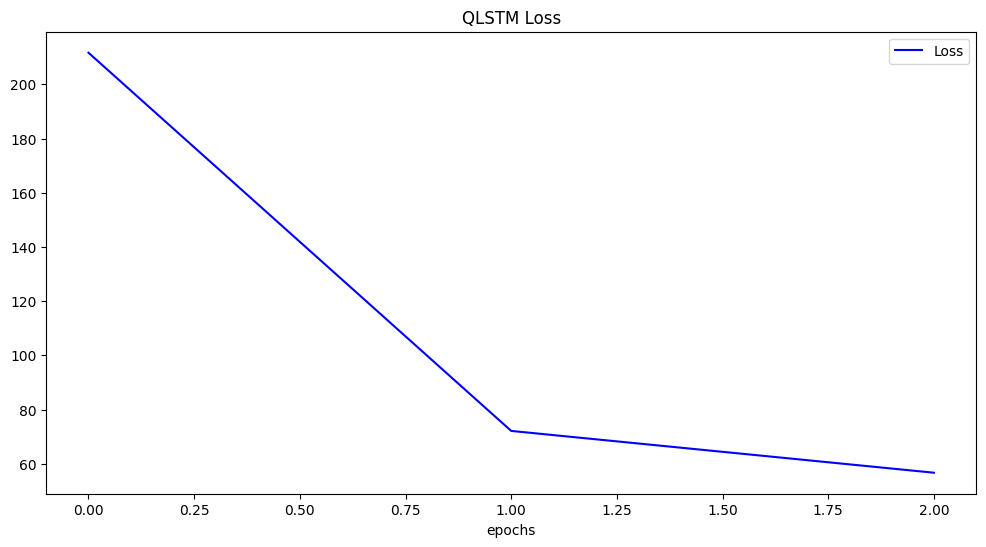

In [32]:
plt.figure(figsize = (12, 6))
plt.plot(histQ, color = 'blue', label = 'Loss')
plt.title('QLSTM Loss')
plt.xlabel('epochs')
plt.legend(loc = 'upper right')

In [33]:
def predict(data_loader, model):
    """Just like `test_loop` function but keep track of the outputs instead of the loss
    function.
    """
    output = torch.tensor([])
    model.eval()
    with torch.no_grad():
        for X, _ in data_loader:
            y_star = model(X)
            output = torch.cat((output, y_star), 0)


    return output

In [34]:
pred_y_train = modelQ(X_train)
pred_y_test = modelQ(X_test)

print(pred_y_train)

tensor([0.7050, 0.2768, 0.2474,  ..., 1.6571, 1.5946, 1.5315],
       grad_fn=<ViewBackward0>)


In [35]:
pred_y_train = pred_y_train.reshape(-1, 1)
pred_y_test = pred_y_test.reshape(-1, 1)


In [36]:
pred_y_train

tensor([[0.7050],
        [0.2768],
        [0.2474],
        ...,
        [1.6571],
        [1.5946],
        [1.5315]], grad_fn=<ViewBackward0>)

In [37]:
y_train_true = train_target_scalar.inverse_transform(y_train)
y_train_pred = train_target_scalar.inverse_transform(pred_y_train.cpu().detach().numpy())
y_test_true = test_target_scalar.inverse_transform(y_test)
y_test_pred = test_target_scalar.inverse_transform(pred_y_test.cpu().detach().numpy())

Training dataset RMSE:28.35741780266238


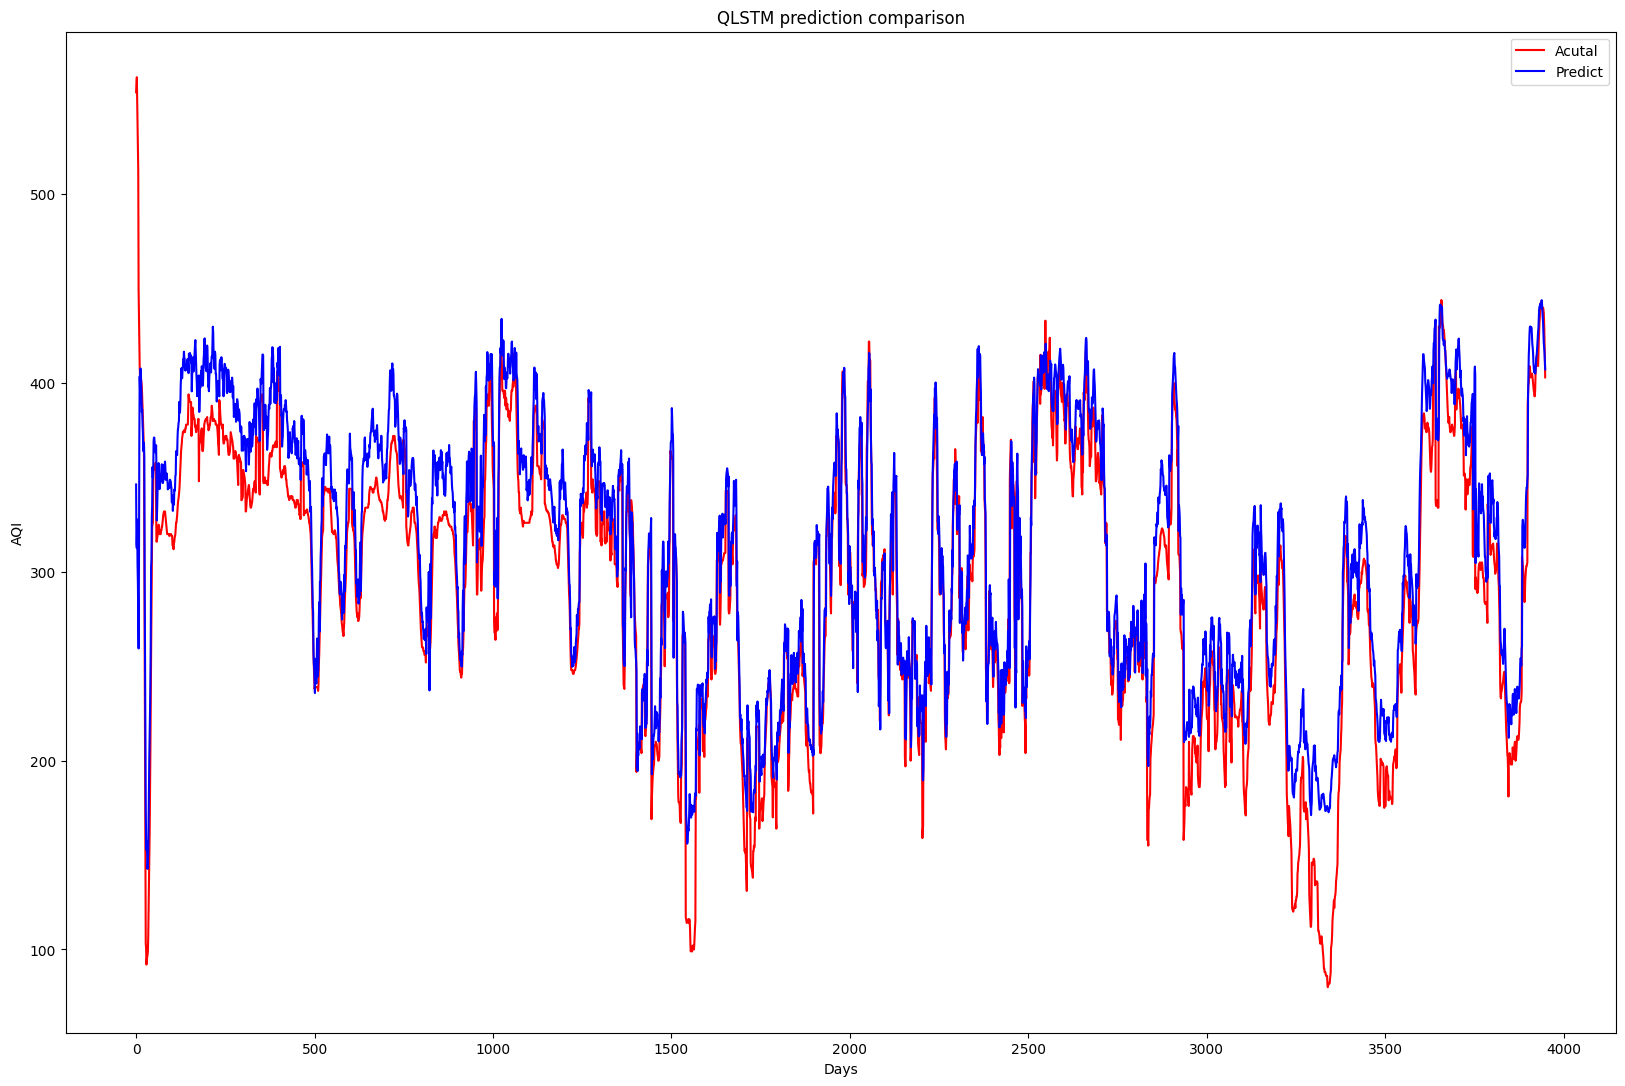

In [38]:
plt.figure(figsize=(20, 13))
plt.plot(y_train_true, color = 'red', label = 'Acutal')
plt.plot(y_train_pred, color = 'blue', label = 'Predict')
plt.title('QLSTM prediction comparison')
plt.ylabel('AQI')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_train_true, y_train_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')

Training dataset RMSE:23.977873291061893


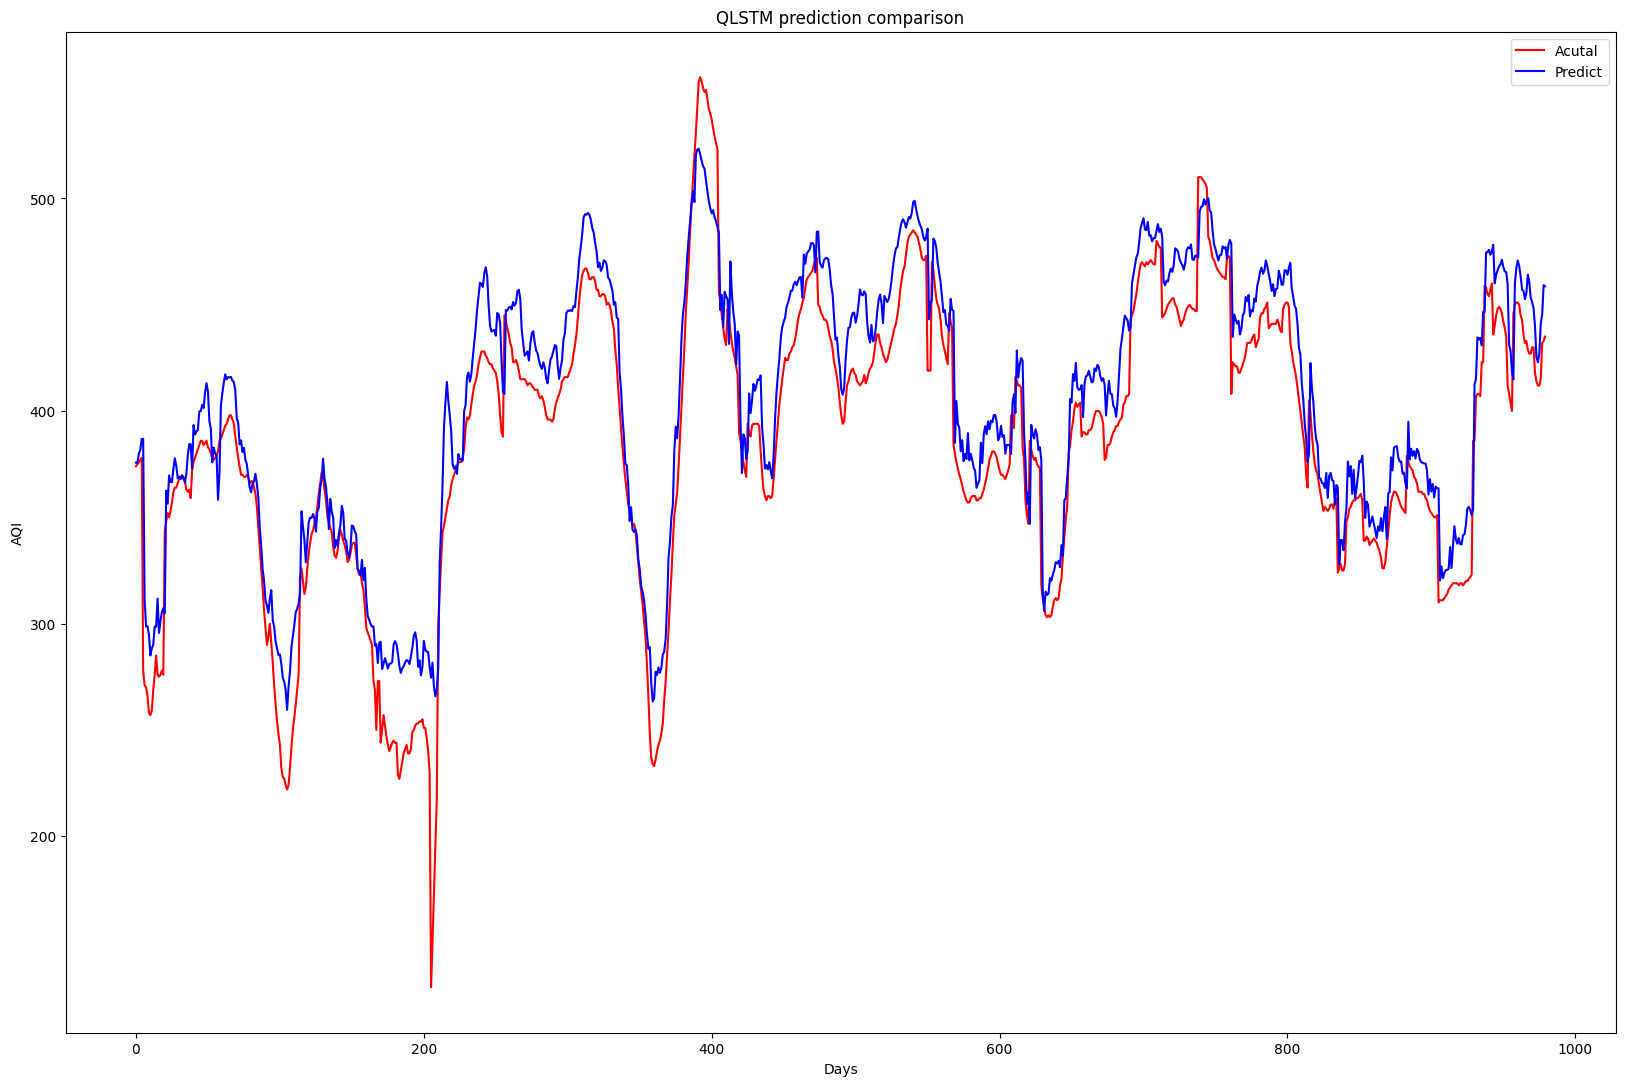

In [39]:
plt.figure(figsize=(20, 13))
plt.plot(y_test_true, color = 'red', label = 'Acutal')
plt.plot(y_test_pred, color = 'blue', label = 'Predict')
plt.title('QLSTM prediction comparison')
plt.ylabel('AQI')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_test_true, y_test_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')